In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

## Basic Data Exploration

- Load the dataset and display the first five rows.
- Get the summary statistics of the dataset.
- Check for missing values and handle them appropriately.
- Identify the number of unique cities in the dataset.
- Find out the date range covered in the dataset.

In [85]:
data = pd.read_csv("city_day.csv",parse_dates=["Datetime"])

In [42]:
data.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,60.9,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,486.5,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,174.4,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,489.7,Good


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        18265 non-null  object        
 1   Datetime    18265 non-null  datetime64[ns]
 2   PM2.5       18265 non-null  float64       
 3   PM10        18265 non-null  float64       
 4   NO          18265 non-null  float64       
 5   NO2         18265 non-null  float64       
 6   NOx         18265 non-null  float64       
 7   NH3         18265 non-null  float64       
 8   CO          18265 non-null  float64       
 9   SO2         18265 non-null  float64       
 10  O3          18265 non-null  float64       
 11  Benzene     18265 non-null  float64       
 12  Toluene     18265 non-null  float64       
 13  Xylene      18265 non-null  float64       
 14  AQI         18265 non-null  float64       
 15  AQI_Bucket  18265 non-null  object        
dtypes: datetime64[ns](1), 

In [22]:
data.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [24]:
data["City"].nunique()

5

In [70]:
print(data["Datetime"].min() ,"to" ,data["Datetime"].max())

2015-01-01 00:00:00 to 2024-12-31 00:00:00


## Filtering & Sorting

- Retrieve all records for a specific city (e.g., "Delhi").
- Filter data for a particular year (e.g., 2020) and analyze trends.
- Sort the data by AQI (Air Quality Index) in descending order.
- Find the top 5 most polluted cities based on the highest AQI recorded.

In [73]:
data[data["City"] == "Delhi"]

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,204.5,Severe
5,Delhi,2015-01-02,344.2,173.2,179.8,128.4,156.1,15.6,6.28,7.5,9.4,0.55,15.60,2.45,238.5,Satisfactory
10,Delhi,2015-01-03,473.9,20.1,12.7,102.7,244.7,42.5,0.04,29.8,42.0,1.87,15.11,2.41,77.6,Satisfactory
15,Delhi,2015-01-04,32.4,414.8,198.1,25.6,218.2,13.2,2.47,50.4,80.2,7.70,12.46,0.57,85.4,Satisfactory
20,Delhi,2015-01-05,312.8,155.8,143.1,106.8,6.1,4.9,4.04,2.0,101.3,13.41,1.66,4.46,396.8,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18240,Delhi,2024-12-27,319.0,527.9,85.2,54.3,240.6,24.0,7.45,7.0,156.0,2.14,29.11,6.10,53.7,Satisfactory
18245,Delhi,2024-12-28,377.0,567.7,89.8,93.8,199.5,13.2,0.66,18.4,187.7,17.82,6.96,9.25,364.0,Severe
18250,Delhi,2024-12-29,70.4,96.5,81.7,125.6,131.3,27.2,1.20,6.6,4.4,8.60,10.23,1.46,83.1,Poor
18255,Delhi,2024-12-30,85.7,338.0,158.3,49.6,78.1,26.6,9.73,88.4,2.7,7.31,26.75,8.08,478.9,Moderate


In [97]:
data[data["Datetime"].dt.year == 2020]

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
9130,Delhi,2020-01-01,457.8,316.1,114.4,88.3,81.9,42.9,7.43,35.3,94.9,2.58,3.18,7.04,311.3,Very Poor
9131,Mumbai,2020-01-01,224.2,23.4,129.6,3.6,182.7,37.9,2.42,73.8,63.7,4.94,28.18,2.92,307.4,Severe
9132,Chennai,2020-01-01,498.4,106.8,69.7,34.3,58.4,7.2,2.65,12.2,49.1,7.97,14.01,9.03,352.1,Satisfactory
9133,Kolkata,2020-01-01,327.3,144.0,19.0,33.3,243.2,20.3,0.94,68.4,49.8,3.17,10.23,4.87,359.3,Poor
9134,Bangalore,2020-01-01,408.3,48.8,87.6,24.1,186.4,6.6,9.39,78.4,103.6,13.28,6.26,8.39,412.8,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,Delhi,2020-12-31,393.6,200.5,161.9,113.3,215.1,2.4,3.44,1.5,11.0,1.55,9.70,6.79,309.8,Satisfactory
10956,Mumbai,2020-12-31,85.9,163.3,94.4,57.3,61.6,7.9,8.77,2.5,90.5,10.06,11.26,3.37,31.4,Satisfactory
10957,Chennai,2020-12-31,251.7,63.8,170.7,72.5,192.8,22.8,2.99,75.0,13.1,4.82,10.58,5.63,106.4,Satisfactory
10958,Kolkata,2020-12-31,495.5,402.5,110.3,67.1,102.7,29.6,8.70,14.9,19.5,5.31,7.46,4.97,170.6,Very Poor


In [99]:
data.sort_values(by="AQI", ascending = False)

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
4411,Mumbai,2017-06-01,287.8,379.5,75.2,147.1,240.4,23.8,1.96,48.9,120.5,14.48,9.39,2.56,500.0,Poor
17983,Kolkata,2024-11-05,293.7,573.4,105.4,136.3,105.3,12.0,7.17,56.4,129.4,1.67,28.26,2.96,499.9,Moderate
8644,Bangalore,2019-09-25,399.2,591.2,16.1,104.7,204.9,49.6,2.89,34.0,162.3,14.20,13.30,5.71,499.9,Moderate
14375,Delhi,2022-11-15,64.2,528.2,92.8,77.6,72.0,11.6,4.89,45.4,24.2,4.02,15.99,4.70,499.9,Very Poor
9018,Kolkata,2019-12-09,148.0,73.6,22.9,35.7,169.0,25.6,4.27,35.4,50.3,12.31,8.77,8.47,499.9,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,Delhi,2018-12-22,15.4,551.0,9.5,3.6,36.7,19.6,3.87,21.2,120.0,1.09,28.29,3.46,0.2,Very Poor
1288,Kolkata,2015-09-15,401.5,30.9,161.7,107.9,57.5,29.3,1.51,73.6,82.2,3.78,12.64,0.61,0.1,Poor
13213,Kolkata,2022-03-27,75.8,451.5,186.5,30.3,127.2,39.0,9.42,13.4,132.7,10.39,14.78,3.31,0.1,Good
15184,Bangalore,2023-04-25,106.9,533.2,189.4,96.3,97.7,44.3,1.76,62.3,43.2,8.15,2.63,2.03,0.1,Poor


In [129]:
data.sort_values(by="AQI", ascending = False)["City"].head()

4411        Mumbai
17983      Kolkata
8644     Bangalore
14375        Delhi
9018       Kolkata
Name: City, dtype: object

In [121]:
data.groupby('City')['AQI'].max().sort_values(ascending=False).head()

City
Mumbai       500.0
Bangalore    499.9
Delhi        499.9
Kolkata      499.9
Chennai      499.8
Name: AQI, dtype: float64

## GroupBy & Aggregation

- Find the average AQI per year.
- Determine the city with the highest average AQI for each year.
- Calculate the median AQI for each city.
- Find the total number of days where AQI was classified as "Severe" for each city.

In [142]:
data.groupby(data['Datetime'].dt.year)['AQI'].mean()

Datetime
2015    247.418027
2016    250.105792
2017    250.886795
2018    246.312329
2019    255.429644
2020    247.307760
2021    252.502740
2022    250.474301
2023    257.006137
2024    253.676448
Name: AQI, dtype: float64

In [154]:
data.groupby(['City', data['Datetime'].dt.year])['AQI'].mean().reset_index()

,City,Datetime,AQI
0,Bangalore,2015,245.540822
1,Bangalore,2016,259.028142
2,Bangalore,2017,239.641644
3,Bangalore,2018,240.033425
4,Bangalore,2019,253.148767
5,Bangalore,2020,260.481967
6,Bangalore,2021,246.932877
7,Bangalore,2022,258.226301
8,Bangalore,2023,250.277260
9,Bangalore,2024,244.322951


In [158]:
data.groupby(['City'])['AQI'].median()

City
Bangalore    247.8
Chennai      248.6
Delhi        257.2
Kolkata      249.5
Mumbai       254.4
Name: AQI, dtype: float64

In [162]:
data[data['AQI_Bucket'] == 'Severe'].groupby('City').size()

City
Bangalore    649
Chennai      615
Delhi        633
Kolkata      621
Mumbai       603
dtype: int64

## Time Series Analysis

- Plot the trend of AQI over time for a specific city.
- Find out which month has the highest average AQI across all years.
- Analyze the seasonal variation in air pollution (e.g., compare winter vs. summer).
- Check if there is a pattern in AQI levels during festivals like Diwali or Holi.

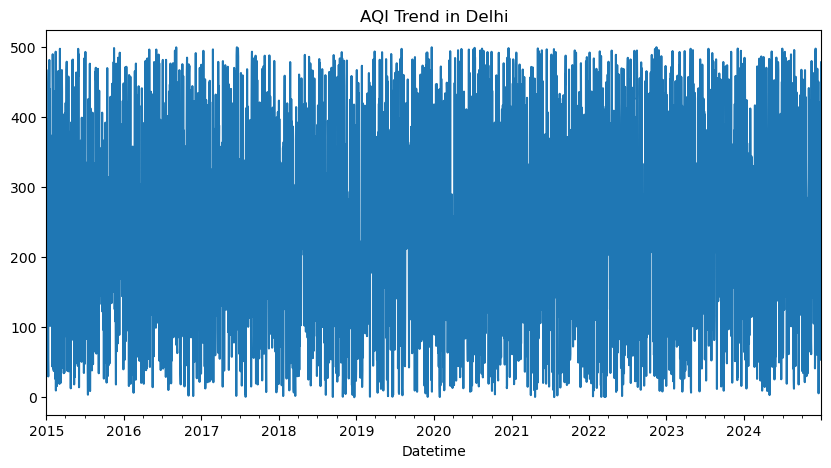

In [177]:
plt.figure(figsize=(10, 5))
data[data['City'] == 'Delhi'].set_index('Datetime')['AQI'].plot(title='AQI Trend in Delhi')
plt.show()

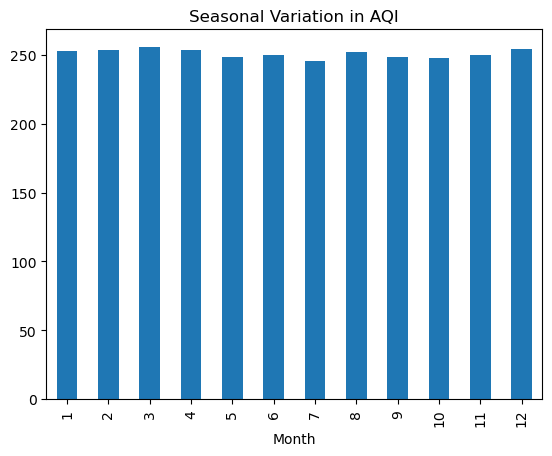

In [183]:
data['Month'] = data['Datetime'].dt.month
seasonal_aqi = data.groupby('Month')['AQI'].mean()
seasonal_aqi.plot(kind='bar', title='Seasonal Variation in AQI')
plt.show()
